In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys
sys.path.append("../") 
from wfslib.geometry import Geometry
from wfslib.wfs import WFSData

path = "data/bad_image.tiff"

arr = np.array(Image.open(path))[500:1500, 500:1500]
arr = np.expand_dims(arr, 0)
wfs = WFSData(arr)
wfs.geometry.set_options(shift=(2, 2))

plt.imshow(arr[0])
wfs.show_geometry()

C:\Users\Zoya\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[197, 204, 260, 263, 266, 275, 296, 310, 316, 336, 349, 407, 421, 426, 441, 470, 512, 530, 541, 566, 569, 572, 579, 594, 639, 646, 739]
[324, 430, 451, 460, 468, 483, 486, 491, 506, 514, 539, 583, 589, 596, 605, 614, 648, 725, 756, 799, 806, 865]


..\wfslib\wfs.py:103: UserWarning: WARNING: Set the geometry for the file!
  warn("WARNING: Set the geometry for the file!", UserWarning)


KeyboardInterrupt: 

In [5]:
wfs.geometry.options

{'border': 9.0, 'cell_width': 17.0, 'start_point': [264, 435]}

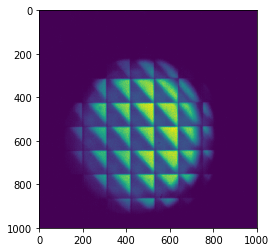

In [6]:
plt.imshow(arr[0])

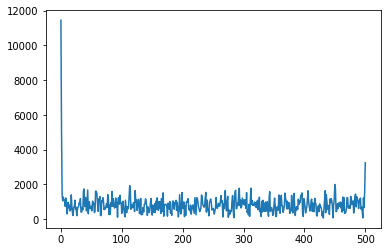

In [10]:
plt.plot(abs(np.fft.rfft(arr[0][0:,0])));

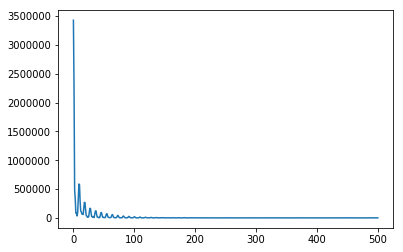

In [4]:
plt.plot(abs(np.fft.rfft(np.mean(arr[0],axis = 0))));

In [7]:
harz = abs(np.fft.rfft(np.mean(arr[0],axis = 0)))
print(harz)

3425390.9280000003


C:\Users\Zoya\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


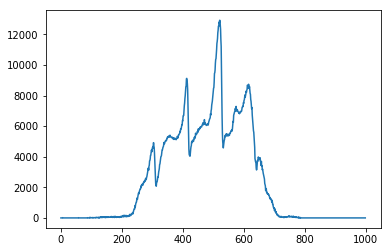

In [3]:
plt.plot(np.fft.ifft(np.fft.fft(np.median(arr[0],axis = 0))));

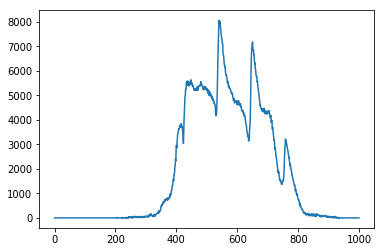

In [2]:
plt.plot(np.mean(arr[0],axis = 1));

In [46]:
import h5py
h5f = h5py.File('one_frame.h5','r')
data = h5f['image'][:]

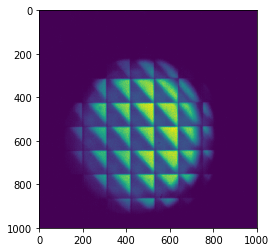

In [80]:
plt.imshow(arr[0])

In [102]:
import pywt
coeffs = pywt.wavedec(np.mean(arr[0],axis = 0), 'haar', level = 5)   
ca, cd = coeffs[0],coeffs[1:]  

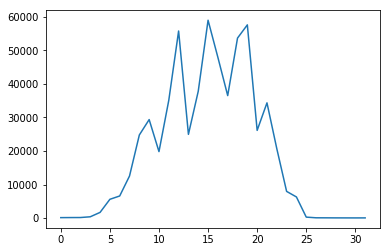

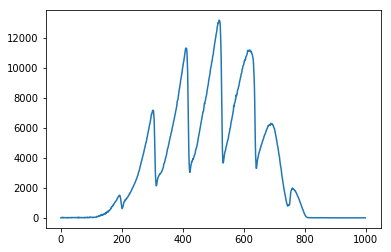

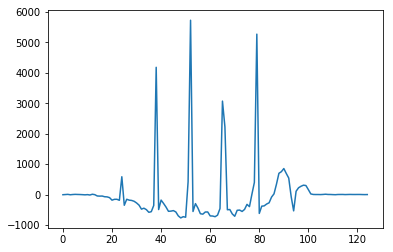

In [105]:
plt.plot(ca)
plt.show()
plt.plot(np.mean(arr[0],axis = 0))
plt.show()
plt.plot(cd[2])
plt.show()

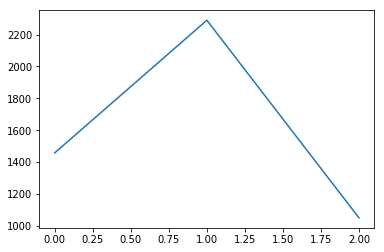

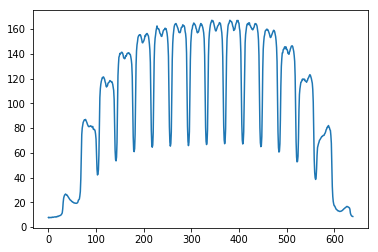

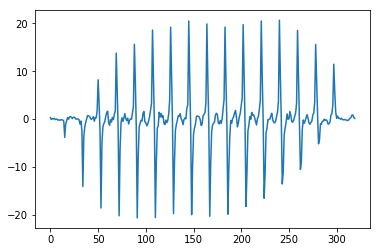

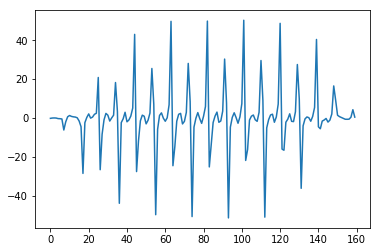

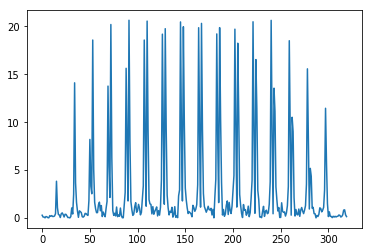

In [100]:
coeffs = pywt.wavedec(np.mean(data,axis = 0), 'haar', level = 8)   
ca, cd = coeffs[0],coeffs[1:]  

plt.plot(ca)
plt.show()
plt.plot(np.mean(data,axis = 0))
plt.show()
plt.plot(cd[7])
plt.show()
plt.plot(cd[6])
plt.show()
plt.plot(abs(cd[7]))
plt.show()